<a href="https://colab.research.google.com/github/HridayAg0102/ML-models/blob/main/MNIST_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This model is used to predict the number from handwritten number's image


---



In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

"""
Alternative method to load the dataset:
======================================

from keras.datasets import mnist
array = mnist.load_data()

train_images, train_labels = array[0]
test_images, test_labels = array[1]

"""

11501568/11490434 [==============================] - 0s 0us/step


'\nAlternative method to load the dataset:\n======================================\n\nfrom keras.datasets import mnist\narray = mnist.load_data()\n\ntrain_images, train_labels = array[0]\ntest_images, test_labels = array[1]\n\n'

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
# Adding layers to the Neural Network

from keras import models
from keras import layers 

network = models.Sequential()
network.add(layers.Dense(512, activation= "relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation = "softmax"))


In [4]:
# aaplication of optimizer, loss function and metrics
# Loss function : gives direction to the model and helps it decide how it is performing
# metrics : on what basis we must judge the model (here "accuracy" is used, which is the number of correct predictions out of total predictions)
# optimizer : this is the way our model should transform itself to perform better.

network.compile(optimizer = "rmsprop",
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

In [5]:
# Preparing image data

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255       # image size normalisation

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

train_images.shape


(60000, 784)

In [6]:
# Preparing the labels (Label Encoding)

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


train_labels.shape

(60000, 10)

In [7]:
train_images.shape

(60000, 784)

In [8]:
test_images.shape

(10000, 784)

In [9]:

train_labels.shape


(60000, 10)

In [10]:
test_labels.shape

(10000, 10)

In [11]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2624 - accuracy: 0.9246
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1040 - accuracy: 0.9691
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0688 - accuracy: 0.9794
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0496 - accuracy: 0.9854
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0377 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0282 - accuracy: 0.9919
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0217 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0169 - accuracy: 0.9956
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0125 - accuracy: 0.9963
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0096 - accuracy: 0.9975

In [12]:
test_loss, test_accuracy = network.evaluate(test_images,test_labels)
print(f"test accuracy is: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9790
test accuracy is: 0.9789999723434448


In [13]:


# To get the array of predicted probablities:

probab = network.predict(test_images)

probab

array([[4.03370393e-12, 1.25042042e-15, 4.13346024e-11, ...,
        9.99999642e-01, 4.79519029e-11, 4.18314769e-08],
       [4.92519632e-15, 2.11374740e-08, 1.00000000e+00, ...,
        3.28237381e-25, 4.22700815e-14, 1.03263748e-22],
       [5.06676472e-11, 9.99994993e-01, 5.37781716e-07, ...,
        2.20907827e-06, 1.16013268e-06, 3.38297390e-10],
       ...,
       [5.57847555e-19, 7.88640190e-14, 3.96247333e-16, ...,
        4.43195614e-09, 3.40061401e-09, 2.23858351e-07],
       [6.04679880e-17, 1.83438865e-17, 8.07146040e-20, ...,
        6.22837068e-19, 4.93484293e-08, 4.72754981e-20],
       [1.09454544e-16, 3.42033206e-20, 1.51714023e-17, ...,
        6.57707376e-24, 2.90757604e-19, 9.45054677e-19]], dtype=float32)

In [14]:
# to check if these values are probabilities, sum of the values in one aray = 1

value = sum(probab[0])

value  # which is near to 1

1.0000000897613617

In [17]:
from google.colab import files
uploaded = files.upload()

Saving ML_model.png to ML_model.png


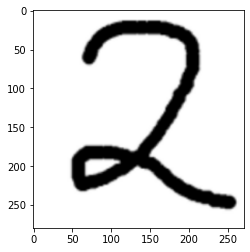

In [19]:
# loading the image in a variable

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('ML_model.png', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [20]:
img.shape

(280, 271, 3)

In [21]:
import numpy as np
from PIL import Image

img_pil = Image.fromarray(img)
img_new = np.array(img_pil.resize((28,28), Image.ANTIALIAS))

rgb_weights = [0.2989, 0.5870, 0.1140]

img_new = np.dot(img_new[...,:3], rgb_weights)
img_new.shape

(28, 28)

In [22]:
img_new = img_new.reshape((1,28*28))
img_new = img_new.astype('float32')/255

In [23]:
pred = network.predict(img_new)
pred

array([[1.4850924e-29, 0.0000000e+00, 1.2836366e-09, 1.1212550e-36,
        0.0000000e+00, 2.9713210e-02, 0.0000000e+00, 9.7028685e-01,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
# Model failed to predict the right result :(